In [22]:
import polars as pl
import matplotlib.pyplot as plt
import os 

# print(os.getcwd()): already in Aggregated_Data folder
df = pl.read_csv("Sector_compounded_yearly_returns.csv")

df

Year,Sector,Compounded Return
i64,str,f64
2015,"""Communication Services""",16.762076
2015,"""Consumer Discretionary""",34.205187
2015,"""Consumer Staples""",45.171659
2015,"""Energy""",-0.997629
2015,"""Financials""",5.403933
…,…,…
2024,"""Industrials""",180521.498008
2024,"""Information Technology""",9111.359934
2024,"""Materials""",-0.086141


In [23]:
df_partitiions = df.partition_by("Sector")
df_partitiions

[shape: (10, 3)
 ┌──────┬────────────────────────┬───────────────────┐
 │ Year ┆ Sector                 ┆ Compounded Return │
 │ ---  ┆ ---                    ┆ ---               │
 │ i64  ┆ str                    ┆ f64               │
 ╞══════╪════════════════════════╪═══════════════════╡
 │ 2015 ┆ Communication Services ┆ 16.762076         │
 │ 2016 ┆ Communication Services ┆ 14.419799         │
 │ 2017 ┆ Communication Services ┆ 206.339666        │
 │ 2018 ┆ Communication Services ┆ 1.30939           │
 │ 2019 ┆ Communication Services ┆ 453.973831        │
 │ 2020 ┆ Communication Services ┆ 79.494973         │
 │ 2021 ┆ Communication Services ┆ 8.866626          │
 │ 2022 ┆ Communication Services ┆ -0.999886         │
 │ 2023 ┆ Communication Services ┆ 198.781753        │
 │ 2024 ┆ Communication Services ┆ 123.026126        │
 └──────┴────────────────────────┴───────────────────┘,
 shape: (10, 3)
 ┌──────┬────────────────────────┬───────────────────┐
 │ Year ┆ Sector                

In [24]:
# number of partitions/ Sectors
len(df_partitiions)

11

In [25]:
# list of sectors
sectors = list(df["Sector"].unique())
sectors

['Consumer Staples',
 'Materials',
 'Information Technology',
 'Financials',
 'Consumer Discretionary',
 'Communication Services',
 'Industrials',
 'Energy',
 'Health Care',
 'Utilities',
 'Real Estate']

In [26]:
colors = [
    "blue",
    "orange",
    "mediumseagreen",
    "red",
    "purple",
    "brown",
    "fuchsia",
    "gray",
    "olive",
    "aqua",
    "gold"
]
colors

['blue',
 'orange',
 'mediumseagreen',
 'red',
 'purple',
 'brown',
 'fuchsia',
 'gray',
 'olive',
 'aqua',
 'gold']

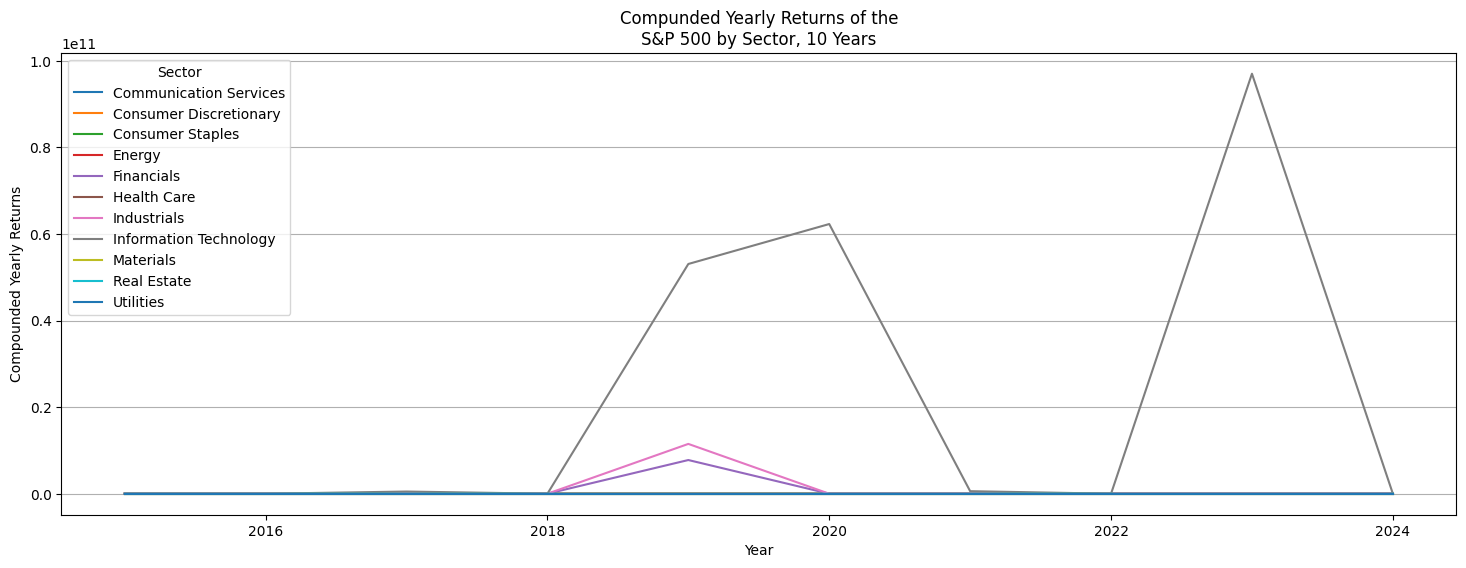

In [27]:
color_map = dict(zip(sectors, colors))
fix, ax = plt.subplots(figsize=(18, 6))

for df_part in df_partitiions:
    sector = df_part["Sector"][0]
    ax.plot(
        df_part["Year"], df_part["Compounded Return"],
        label=sector
        )
    
ax.grid(True, axis="y")
ax.legend(title="Sector")
    
ax.set(xlabel="Year",
        ylabel="Compounded Yearly Returns",
        title="Compunded Yearly Returns of the\nS&P 500 by Sector, 10 Years")
    
plt.show()

We can see how this needs to be broken up into two plots

In [29]:
df.sort("Compounded Return")

Year,Sector,Compounded Return
i64,str,f64
2022,"""Information Technology""",-1.0
2022,"""Consumer Discretionary""",-1.0
2022,"""Financials""",-0.999968
2022,"""Communication Services""",-0.999886
2022,"""Industrials""",-0.99988
…,…,…
2019,"""Financials""",7.7818e9
2019,"""Industrials""",1.1504e10
2019,"""Information Technology""",5.3062e10


TODO:
- Find average
- Find median
- Determine which measure is the better value to use to break up the plot